In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [7]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [8]:
df['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

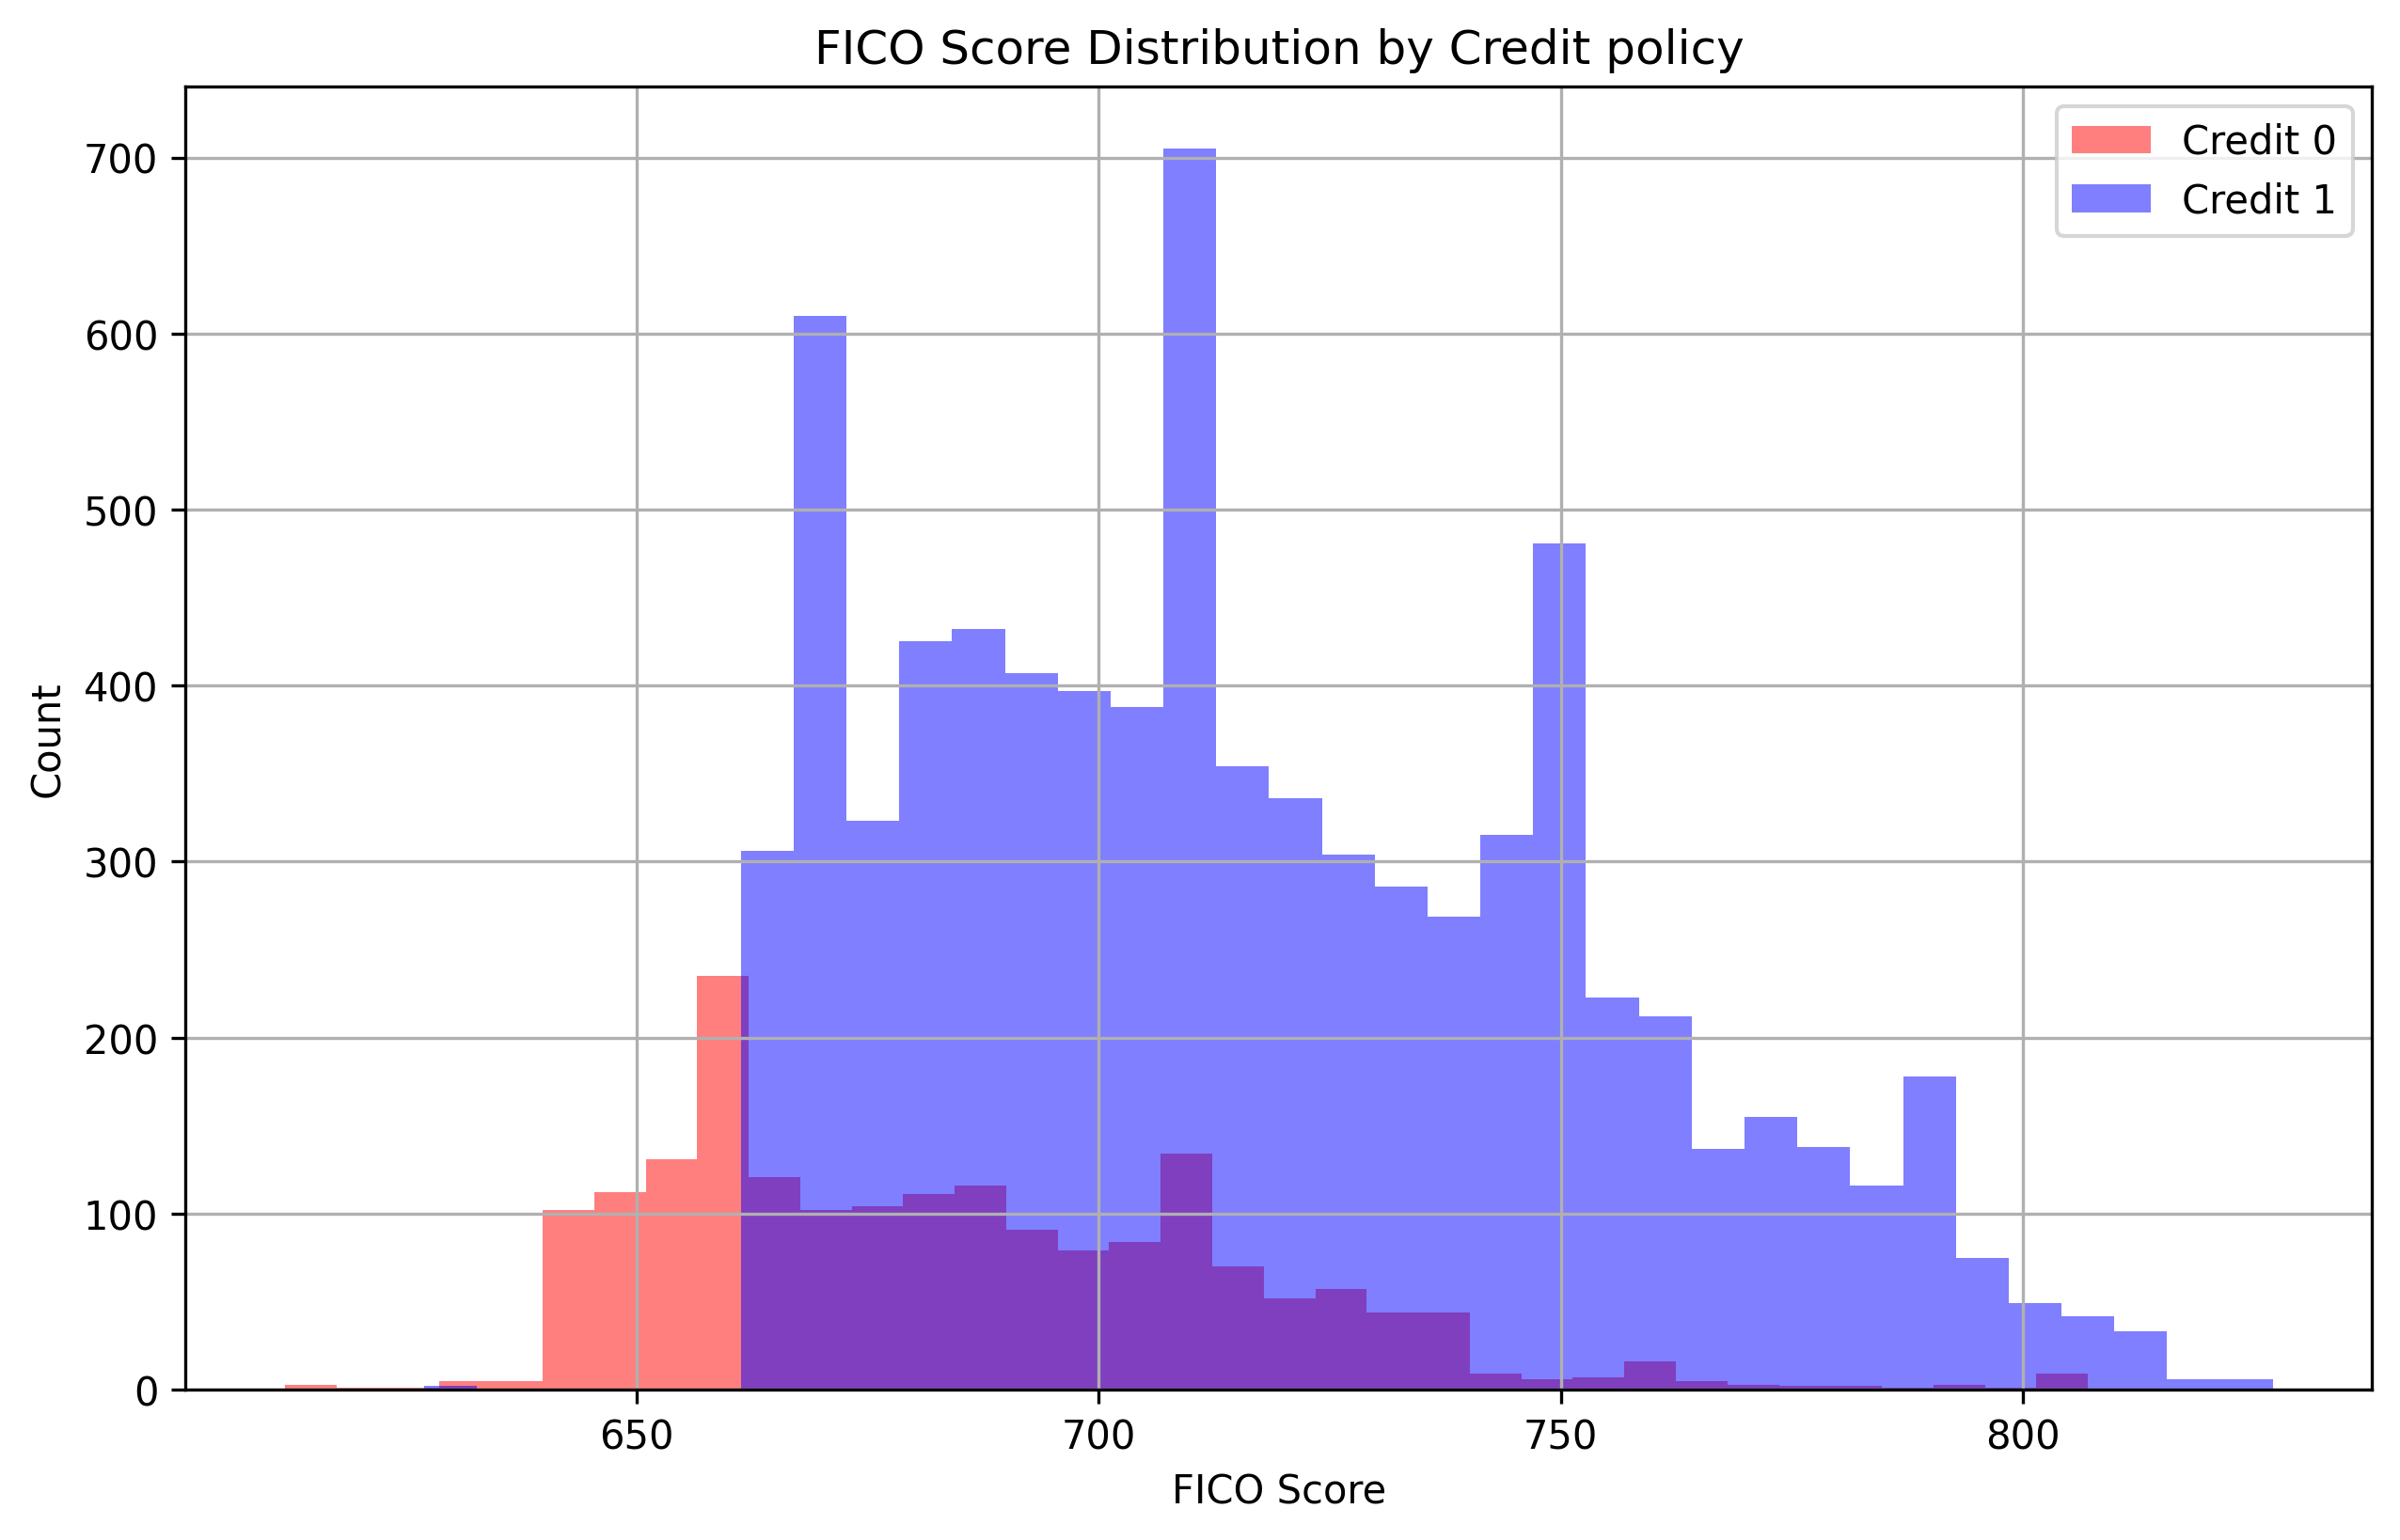

In [9]:
plt.figure(figsize=(10,6), dpi=300)

df[df['credit.policy'] == 0]['fico'].hist(bins=35, alpha=0.5, color='red', label='Credit 0')

df[df['credit.policy'] == 1]['fico'].hist(bins=35, alpha=0.5, color='blue', label ='Credit 1')

plt.legend()
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.title('FICO Score Distribution by Credit policy')
plt.show()

In [10]:
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

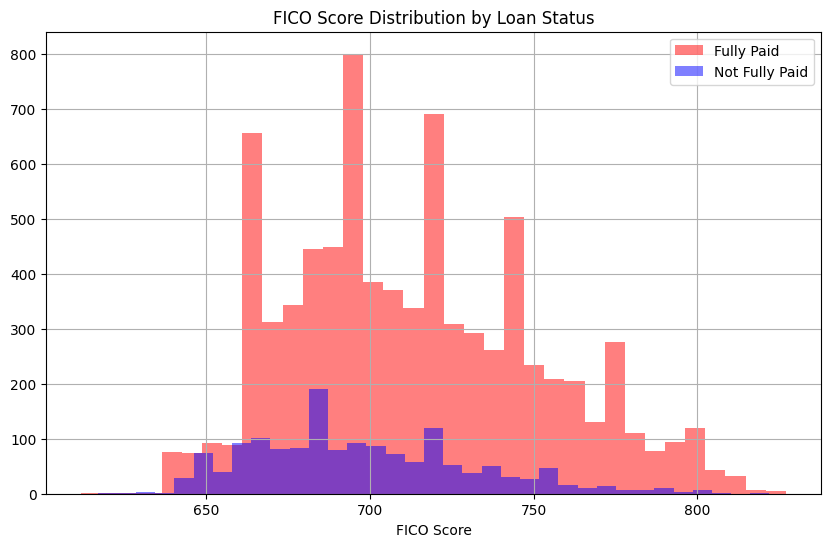

In [11]:
plt.figure(figsize=(10, 6))

df[df['not.fully.paid'] == 0]['fico'].hist(
    bins=35, alpha=0.5, color='red', label='Fully Paid'
)

df[df['not.fully.paid'] == 1]['fico'].hist(
    bins=35, alpha=0.5, color='blue', label='Not Fully Paid'
)

plt.legend()
plt.xlabel('FICO Score')
plt.title('FICO Score Distribution by Loan Status')
plt.show()

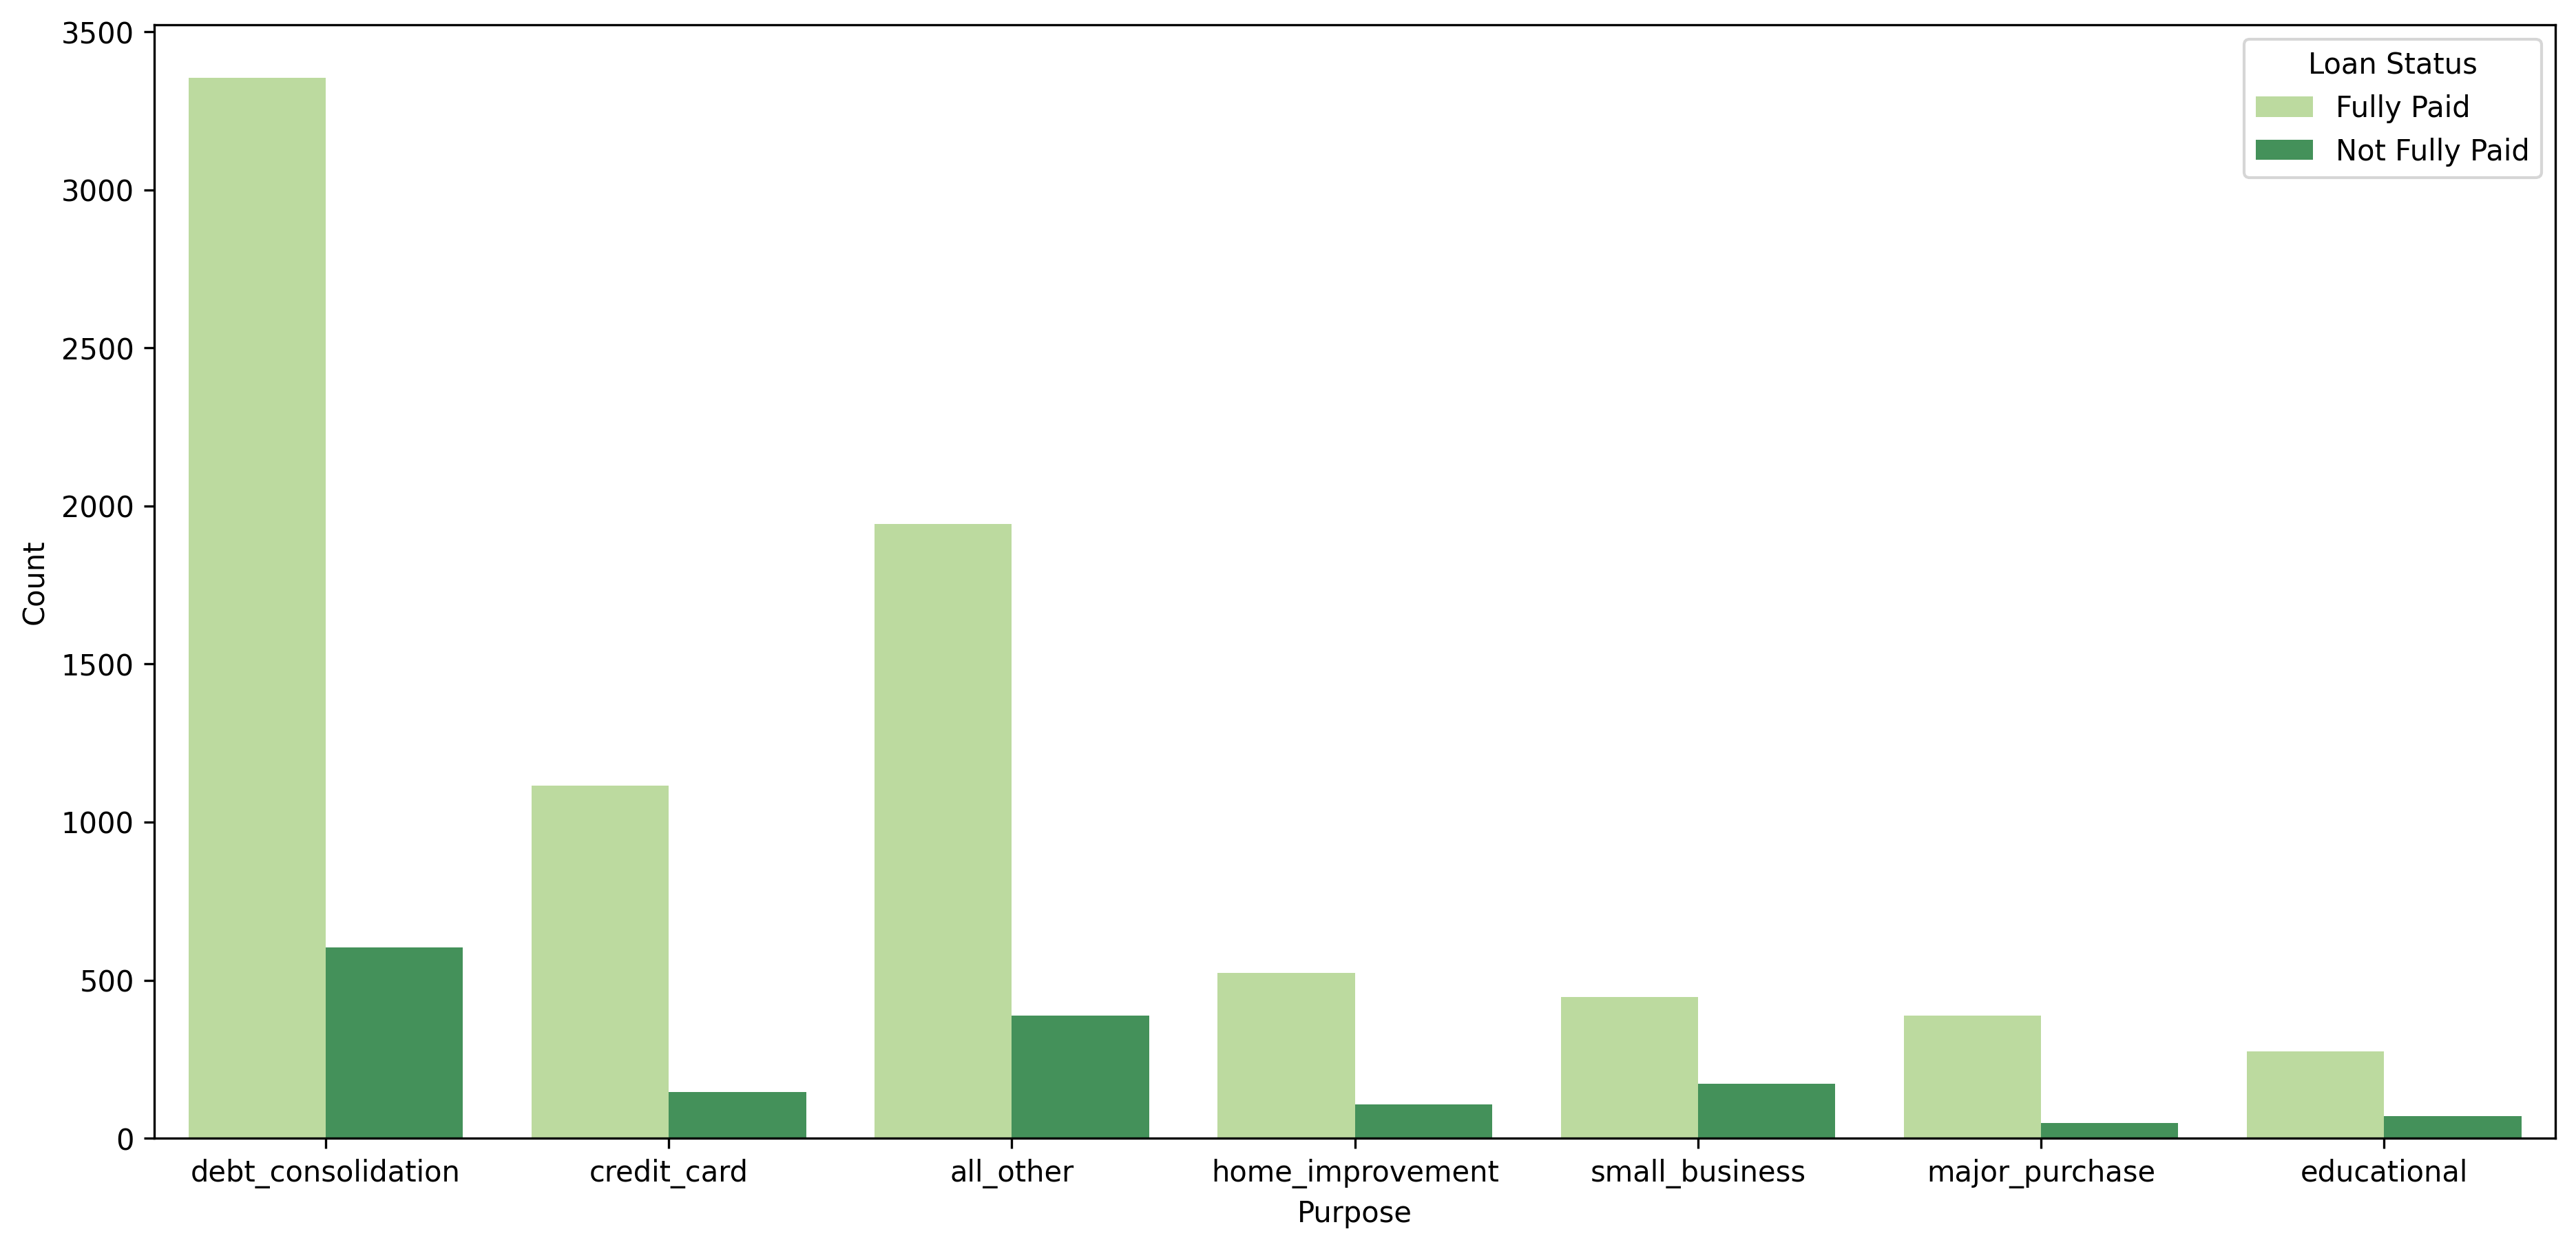

In [12]:
plt.figure(figsize=(15, 7), dpi=300)
count=sns.countplot(data=df, x='purpose', hue='not.fully.paid', palette='YlGn')
count.legend(title='Loan Status', labels=['Fully Paid', 'Not Fully Paid'])
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

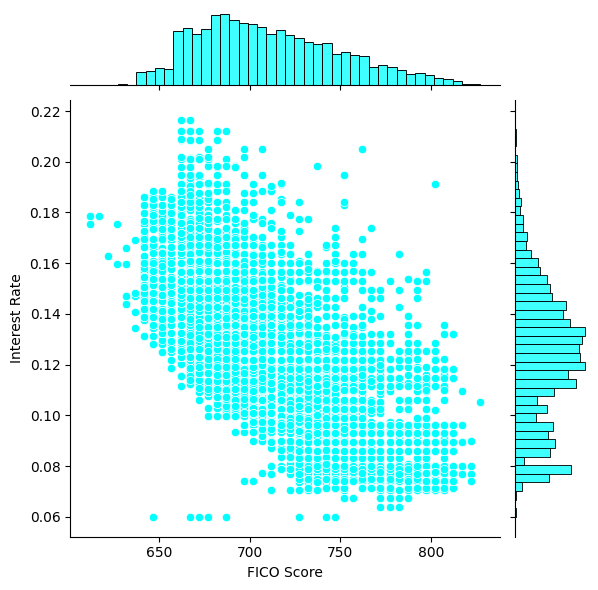

In [13]:
sns.jointplot(data=df, x='fico', y='int.rate', color='cyan')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.show()

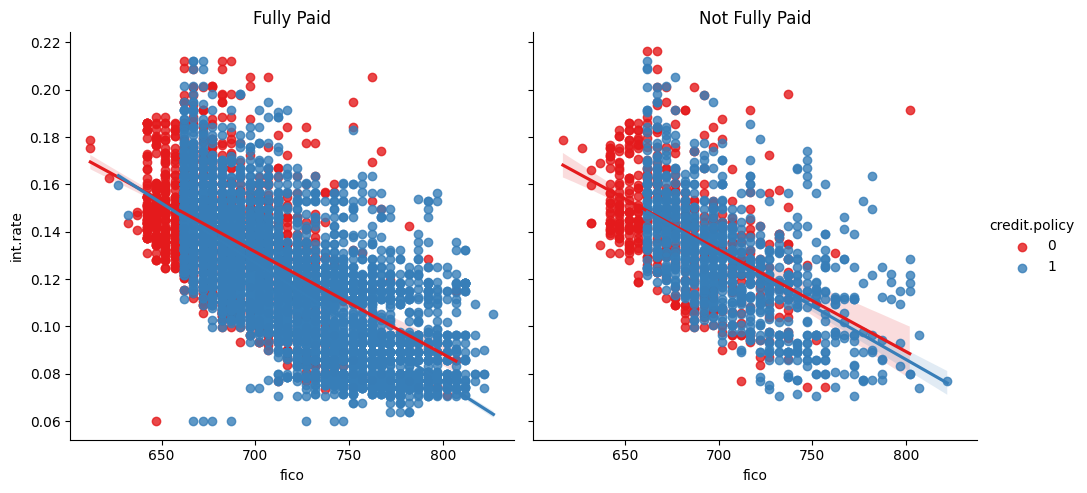

In [14]:
g = sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set1')

new_titles = {0: 'Fully Paid', 1: 'Not Fully Paid'}

for ax, title in zip(g.axes.flat, df['not.fully.paid'].unique()):
    ax.set_title(new_titles[title])
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [16]:
final_data = pd.get_dummies(data=df, columns=['purpose'], drop_first=True, dtype=int)
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [17]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [18]:
from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### DECISION TREE MODEL

In [19]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
predictions1 = d_tree.predict(X_test)

In [21]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



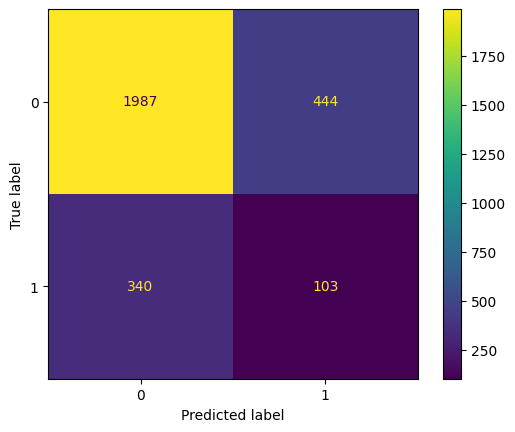

<Figure size 1200x1500 with 0 Axes>

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(d_tree, X_test, y_test)
plt.figure(figsize=(4,5), dpi=300)
plt.show()

### RANDOM FOREST MODEL

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [24]:
predictions2 = rf.predict(X_test)
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.48      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



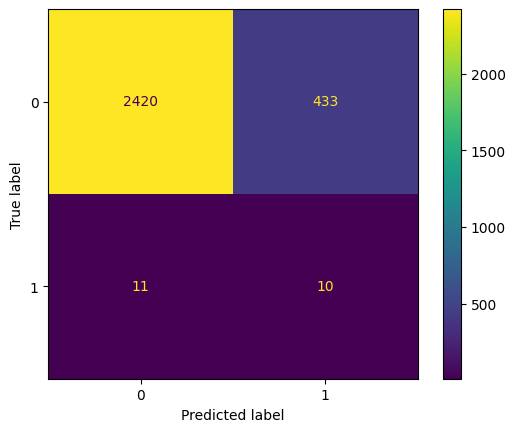

<Figure size 1200x1500 with 0 Axes>

In [25]:
ConfusionMatrixDisplay.from_predictions(predictions2, y_test)
plt.figure(figsize=(4,5), dpi=300)
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
rf = RandomForestClassifier()

In [28]:
parameters = {
    'n_estimators': np.arange(50, 401, 50),
    'criterion': ["gini", "entropy"],
    'max_features': ["sqrt", "log2"],  # removed 'auto'
    'n_jobs': [-1]  # This should be passed to the model, not in param_grid
}

In [29]:
grid = GridSearchCV(rf, parameters, cv=5, verbose=1)

In [30]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400]),
                         'n_jobs': [-1]},
             verbose=1)

In [31]:
grid.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'n_estimators': 350,
 'n_jobs': -1}

In [32]:
grid_predictions = grid.predict(X_test)

In [33]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.43      0.01      0.03       443

    accuracy                           0.85      2874
   macro avg       0.64      0.51      0.47      2874
weighted avg       0.78      0.85      0.78      2874



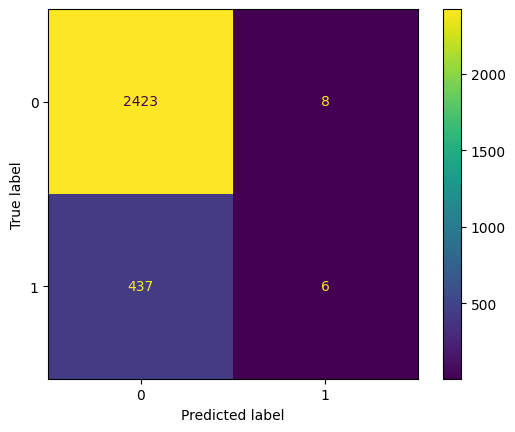

<Figure size 1200x1500 with 0 Axes>

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_predictions)
plt.figure(figsize=(4,5), dpi=300)
plt.show()